In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt
from datetime import timedelta
from datetime import datetime
from dateutil.relativedelta import relativedelta

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///hawaii.sqlite")

In [5]:
# reflect an existing database into a new model

# reflect the tables
# Reflect Database into ORM classes
Base = automap_base()
Base.prepare(engine, reflect=True)


In [6]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [7]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [8]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [9]:
# Find the most recent date in the data set.
recent_date = session.query(Measurement.date).order_by(Measurement.date.desc()).first()
recent_date

('2017-08-23',)

In [53]:
datetime_object = datetime.strptime(recent_date[0], '%Y-%d-%M')
datetime_object

datetime.datetime(2017, 1, 8, 0, 23)

<AxesSubplot:xlabel='date'>

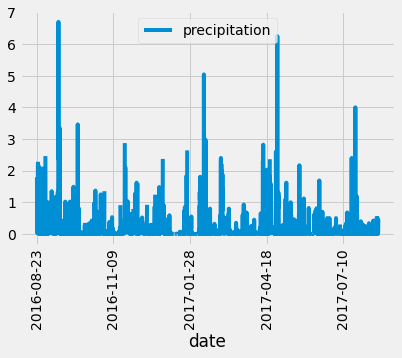

In [62]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
#Starting from the last data point in the database. 

# Calculate the date one year from the last date in data set.
prev_year = dt.date(2017, 8, 23) - dt.timedelta(days=365)

# Perform a query to retrieve the data and precipitation scores
results = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date >= prev_year).all()

# Save the query results as a Pandas DataFrame and set the index to the date column
df = pd.DataFrame(results, columns=['date', 'precipitation'])
df.set_index(df['date'], inplace=True)

# Sort the dataframe by date
# df = df.sort_values("date")
df = df.sort_index()

# Use Pandas Plotting with Matplotlib to plot the data
df.plot(rot=90)

In [63]:
# Use Pandas to calcualte the summary statistics for the precipitation data
df.describe()

,precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [66]:
# Design a query to calculate the total number stations in the dataset
results = session.query(func.count(Measurement.station))
for row in results:
    print(row)

(19550,)


In [148]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# # List the stations and the counts in descending order.

active_station = session.query(Measurement.station, func.count(Measurement.station)).group_by(Measurement.station).order_by(func.count(Measurement.station).desc())

for row in active_station:
    print(row)


('USC00519281', 2772)
('USC00519397', 2724)
('USC00513117', 2709)
('USC00519523', 2669)
('USC00516128', 2612)
('USC00514830', 2202)
('USC00511918', 1979)
('USC00517948', 1372)
('USC00518838', 511)


In [144]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
most_active_station_data = session.query(func.min(Measurement.prcp), func.max(Measurement.prcp), func.avg(Measurement.prcp)).filter(Measurement.station == active_station[0][0])


for row in idk:
    print(row)


(0.0, 9.64, 0.2123520923520915)


<AxesSubplot:ylabel='Frequency'>

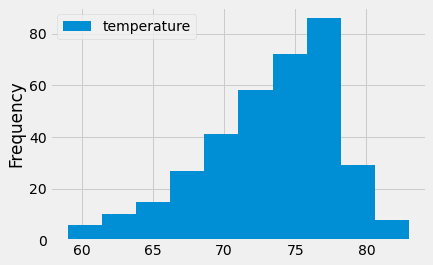

In [147]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram

# Perform a query to retrieve the data and precipitation scores
results1 = session.query(Measurement.tobs, Measurement.date).filter(Measurement.date >= prev_year).filter(Measurement.station == active_station[0][0]).all()

# Save the query results as a Pandas DataFrame and set the index to the date column
df = pd.DataFrame(results1, columns=['temperature', 'date'])
df.set_index(df['date'], inplace=True)

# Sort the dataframe by date
# df = df.sort_values("date")
df = df.sort_index()

# Use Pandas Plotting with Matplotlib to plot the data
df.plot.hist()


# Close session

In [ ]:
# Close Session
session.close()